In [40]:
# Pandas
import pandas as pd
# SQL Alchemy
from sqlalchemy import create_engine
import psycopg2
from sqlalchemy.ext.declarative import declarative_base
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np


In [2]:
# The path to our CSV file
file = "data/salaries.csv"

# Read salaries data into pandas
salaries_df = pd.read_csv(file)
salaries_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [3]:
#check if emp_no is unique in salaries
len(salaries_df)

300024

In [4]:
salaries_df.emp_no.nunique()

300024

In [5]:
# The path to our CSV file
empdepfile = "data/dept_emp.csv"

# Read our Kickstarter data into pandas
emp_dep_df = pd.read_csv(empdepfile)
# Read our Kickstarter data into pandas
emp_dep_df.head()

,emp_no,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003


In [6]:
#check if emp_no is unique in emp_dep
len(emp_dep_df)

331603

In [7]:
emp_dep_df.emp_no.nunique()

300024

In [8]:
# The path to our CSV file
depmgrfile = "data/dept_manager.csv"

# Read our dep mgr data into pandas
dep_mgr_df = pd.read_csv(depmgrfile)

dep_mgr_df.head()

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


In [9]:
#check if emp_no is unique
len(dep_mgr_df)

24

In [10]:
dep_mgr_df.emp_no.nunique()

24

In [11]:
#Read in using sqlalchemy 
#Create a histogram to visualize the most common salary ranges for employees.


In [12]:
engine = create_engine('postgresql://localhost:5432/EmployeeSQL')
conn = psycopg2.connect(dbname="EmployeeSQL", user="postgres", password="")
conn

<connection object at 0x1107401b0; dsn: 'user=postgres password=xxx dbname=EmployeeSQL', closed: 0>

In [13]:
salary = pd.read_sql("SELECT * FROM \"Salaries\" ", conn)
employee = pd.read_sql("SELECT * FROM \"Employees\" ", conn)
title = pd.read_sql("SELECT * FROM \"Titles\" ", conn)

In [25]:
salary.head()

,salary_id,emp_no,salary
0,1,10001,60117
1,2,10002,65828
2,3,10003,40006
3,4,10004,40054
4,5,10005,78228


In [15]:
salary_df=pd.DataFrame(salary)
employee_df=pd.DataFrame(employee)
title_df=pd.DataFrame(title)
#salary_df.salary.unique()

salaries=[]

for s in salary_df.salary:
    salaries.append(s)


In [16]:
len(salaries)

300024

In [17]:
bins=[30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000]

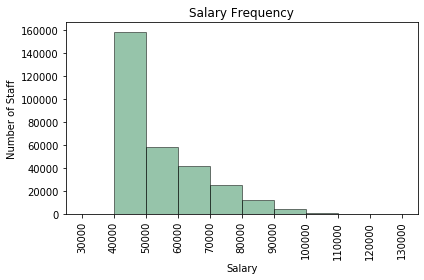

In [18]:


hist1=plt.hist(salaries, bins, alpha=0.5, histtype='bar', ec='black', color='seagreen')
plt.title("Salary Frequency")
plt.xlabel("Salary")
plt.ylabel("Number of Staff")

plt.xticks(bins,rotation='vertical',fontsize = 10) 
plt.yticks(fontsize = 10) 

plt.tight_layout()

plt.show()

In [19]:
#create a bar chart of average salaries by title

In [20]:
salary_df=salary_df.drop(columns='salary_id')

In [26]:
total_df=salary_df.set_index('emp_no').join(employee_df.set_index('emp_no'))
total_df.head()




,salary,emp_title_id,birth_date,first_name,last_name,sex,hire_date
emp_no,,,,,,,
10001,60117,e0003,9/2/1953,Georgi,Facello,M,6/26/1986
10002,65828,s0001,6/2/1964,Bezalel,Simmel,F,11/21/1985
10003,40006,e0003,12/3/1959,Parto,Bamford,M,8/28/1986
10004,40054,e0003,5/1/1954,Chirstian,Koblick,M,12/1/1986
10005,78228,s0001,1/21/1955,Kyoichi,Maliniak,M,9/12/1989


In [27]:
total_df=total_df.set_index('emp_title_id').join(title_df.set_index('title_id'))
total_df.head()

,salary,birth_date,first_name,last_name,sex,hire_date,title
e0001,46671,2/19/1958,Saniya,Kalloufi,M,9/15/1994,Assistant Engineer
e0001,83733,9/5/1958,Suzette,Pettey,F,5/19/1997,Assistant Engineer
e0001,54246,12/15/1955,Heekeun,Majewski,M,4/8/1987,Assistant Engineer
e0001,53031,11/6/1964,Prodip,Schusler,F,6/20/1985,Assistant Engineer
e0001,56061,12/10/1957,Jeong,Sadowsky,M,8/6/1995,Assistant Engineer


In [23]:
average_salary=total_df.groupby("title")["salary"].mean().round(0)
average_salary_df=pd.DataFrame(average_salary)
average_salary_df

,salary
title,
Assistant Engineer,48564.0
Engineer,48535.0
Manager,51531.0
Senior Engineer,48507.0
Senior Staff,58550.0
Staff,58465.0
Technique Leader,48583.0


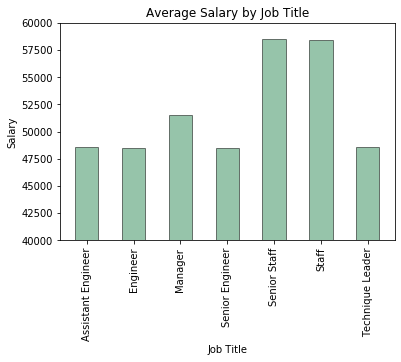

In [43]:
bar2 = plt.bar(average_salary_df.index, average_salary_df.salary, alpha=0.5, ec='black', color='seagreen',width=.5)
plt.xticks(rotation="vertical")


# Set title and labels

plt.title("Average Salary by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Salary")
plt.ylim(40000, 60000)


plt.show()